# Mod 6.1.4

Let's practice zipping a small number of latitudes and longitudes 
and then unpacking the zipped tuple to see how the packing and unpacking work.

In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
# import the citipy script from the citipy module
from citipy import citipy

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

# Mod 6.2.3

In [5]:
# import the Requests Library and your API key from the config.py file
import requests

import sys
sys.path.append("C:\\Users\\c-hol\\Desktop\\Bootcamp")
from api_keys import OWMap_key
weather_api_key = OWMap_key

practice making an API call and look at the data returned from the API call

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

Get: Error: {"cod":"400","message":"Nothing to geocode"}

Next, add a city to the URL to get the current weather data

In [7]:
# Create an endpoint URL for a city.

city = "Boston"
city_url = url + "&q=" + city

Get: 
{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":36,"feels_like":28.69,"temp_min":31.73,"temp_max":39.49,"pressure":1012,"humidity":80},"visibility":10000,"wind":{"speed":10,"deg":346,"gust":15.01},"clouds":{"all":75},"dt":1640555184,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1640520737,"sunset":1640553445},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}

Add JSONViewer extension & get: 
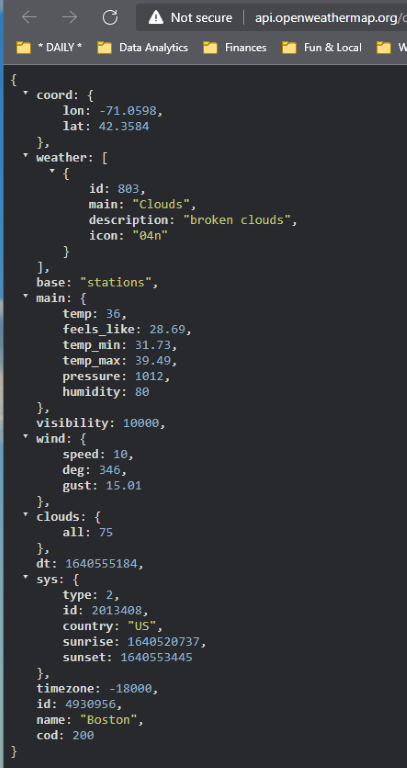

In [8]:
# JSON = JavaScript Object Notation
# request data from the Open Weather map API
# to do this, use .get method to save API response to a variable
weather_response = requests.get(city_url)

# request data from the Open Weather map API
weather_json = weather_response.json()

# Explore each layer, start with .keys method
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

Most are clear, but what is "main"?

In [9]:
weather_json.get("main")

# notice the values are in Kelvins

{'temp': 34.18,
 'feels_like': 28.83,
 'temp_min': 30.94,
 'temp_max': 36.37,
 'pressure': 1014,
 'humidity': 75}

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

 <Response [200]>    indicates a valid response
 404 code            indicates a client error
 
 directly call the response code with the get() method using the status_code. If we chain the status_code to the city_weather variable, we get 200 as the output.
 
 If we tried to get weather data from an unrecognized city, or if the weather data for a city wasn't available, we would get a 404 response.

In [11]:
# Try and misspell a city:

city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

When we receive a valid response from the server, we have to decide on the data format. The options are text, JSON, XML, or HTML format. We can apply the format attributes to get the data into a useful format to parse.

One format that provides a preview of the JSON data is the text attribute.

In [13]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],"base":"stations","main":{"temp":34.18,"feels_like":28.83,"temp_min":30.94,"temp_max":36.37,"pressure":1014,"humidity":75},"visibility":10000,"wind":{"speed":5.99,"deg":31,"gust":23},"clouds":{"all":15},"dt":1640570380,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1640520737,"sunset":1640553445},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [14]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 34.18,
  'feels_like': 28.83,
  'temp_min': 30.94,
  'temp_max': 36.37,
  'pressure': 1014,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 31, 'gust': 23},
 'clouds': {'all': 15},
 'dt': 1640570380,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1640520737,
  'sunset': 1640553445},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Misspell the City name
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


# 6.2.5   For each city in our lats_lngs list, retrieve these and add it to a DataFrame  6.2.5

- City, country, and date
- Latitude and longitude
- Maximum temperature
- Humidity
- Cloudiness
- Wind speed

1. Call the data in JSON format

In [18]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 34.18,
  'feels_like': 28.83,
  'temp_min': 30.94,
  'temp_max': 36.37,
  'pressure': 1014,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 31, 'gust': 23},
 'clouds': {'all': 15},
 'dt': 1640570380,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1640520737,
  'sunset': 1640553445},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

2. get something simple, like the country code from the JSON formatted data, which is in a nested dictionary where the first dictionary starts with sys

- assign a variable to the city_weather.json() data to the variable "boston_data" and run the cell.

In [19]:
boston_data = city_weather.json()

In [20]:
boston_data['sys']["country"]

'US'

When we used boston_data["sys"], there was a key for sunrise and a key for sunset in the output. The value for these keys is the time of day in seconds in a database timestamp format.

### Retrieve the date in the weather data

In [21]:
boston_data["dt"]

1640570380

### Retrieve the latitude

In [22]:
boston_data["coord"]["lat"]

42.3584

### Retrieve the max temp

In [23]:
boston_data["main"]["temp_max"]

36.37

### Retrieve all these:

In [24]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 36.37 75 15 5.99


### Convert the date timestamp

In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

# OUTPUT: ISO format with the, year, month, date, hour, minute, and seconds

datetime.datetime(2021, 12, 27, 1, 59, 40)

In [26]:
# Convert to this format: YYY-MM-DD HH:MM:SS

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-12-27 01:59:40'